# Billboard Hot 100

__<div style="text-align: right"> EE104: Introduction to Machine learning. </div>__
_<div style="text-align: right"> Jin-Woo Im(jinwooiminha.gmail.com) </div>_

여러분은 사자보이즈의 소속사 **귀마 엔터테인먼트**의 ML 엔지니어입니다.
<br>
<br>
최근 경쟁 걸그룹인 헌트릭스의 노래 Golden이 미국 빌보드 핫100에서 1위를 하고 있어, 사장님의 심기가 매우 불편하십니다.

![분노한 사장님](https://img.hankyung.com/photo/202507/01.41057505.1.jpg)
<br>
<br>
그래서 사장님은 저희에게 2개의 임무를 맡기셨습니다.

## 임무


- **T1. 데이터 시각화:** 우리 노래 **Soda-Pop**, **Your Idol**이 얼마나 흥행한지를 시각화
- **T2.  예측:** 우리 소속사의 노래의 미래 흥행을 예측


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests, pathlib
import zipfile

url = "https://raw.githubusercontent.com/Pseudo-Lab/YEE-104/main/data/7week_window_hot100.zip"
out = pathlib.Path(url.rsplit("/", 1)[-1])

with requests.get(url, stream=True, timeout=30) as r, out.open("wb") as f:
    r.raise_for_status()
    for chunk in r.iter_content(1 << 20):
        if chunk: f.write(chunk)

with zipfile.ZipFile("7week_window_hot100.zip", "r") as z:
    z.extractall(".")

df = pd.read_csv("https://raw.githubusercontent.com/Pseudo-Lab/YEE-104/refs/heads/main/data/hot100.csv")
mask = df["Artist"].eq("HUNTR/X| EJAE| Audrey Nuna & Rei Ami")
df.loc[mask, "Artist"] = "HUNTR/X: EJAE| Audrey Nuna & REI AMI"
mask = df["Artist"].eq("Saja Boys| Andrew Choi| Neckwav| Danny Chung| Kevin Woo & samUIL Lee")
df.loc[mask, "Artist"] = "Saja Boys: Andrew Choi| Neckwav| Danny Chung| Kevin Woo & samUIL Lee"


display(df)

/tmp/ipython-input-3267281413.py:18: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("https://raw.githubusercontent.com/Pseudo-Lab/YEE-104/refs/heads/main/hot100.csv")


,Date,Song,Artist,Rank,Last Week,Peak Position,Weeks in Charts,Image URL
0,1958-08-06,Poor Little Fool,Ricky Nelson,1,1,1,2,#
1,1958-08-06,Nel Blu Dipinto Di Blu (Volare),Domenico Modugno,2,54,2,2,#
2,1958-08-06,Patricia,Perez Prado And His Orchestra,3,2,2,2,#
3,1958-08-06,Splish Splash,Bobby Darin,4,3,3,2,#
4,1958-08-06,When,Kalin Twins,5,5,5,2,#
...,...,...,...,...,...,...,...,...
349982,2025-08-27,Forever Be Mine,Gunna Featuring Wizkid,96,68,68,2,https://charts-static.billboard.com/img/2016/0...
349983,2025-08-27,Somebody,Latto,97,97,2,-,https://charts-static.billboard.com/img/2025/0...
349984,2025-08-27,What Kinda Man,Parker McCollum,98,98,1,-,https://charts-static.billboard.com/img/2024/0...
349985,2025-08-27,Country Song Came On,Luke Bryan,99,93,93,3,https://charts-static.billboard.com/img/2024/1...


<br>

---

<br>

_**(Problem 1)**_ 헌트릭스의 Golden 그리고 귀마 엔터테인먼트의 Soda Pop,  Your Idol이 처음 빌보드 hot 100에 진입했을 때부터의 날짜별 Rank 데이터프레임 데이터를 만드는 함수 Search를 완성해주세요.

In [11]:
def search(df, Song_name,Artist_Name):




    ## To Do------------------------------------------------------------##
    ##                                                                  ##
    ## Song_name과 Artist_Name을 모두 갖는                              ##
    ## 판다스 데이터 프레임을 df에서 각각 "Song"과 "Artist"열에서       ##
    ## 조회하여 반환하는 코드                                           ##
    ## pandas dataframe의 조건문 &의                                    ##
    ## 사용법과 .loc의 사용법을 참조                                    ##
    ##------------------------------------------------------------------##
    ## Your code here

    mask = (df["Song"] == Song_name) & (df["Artist"] == Artist_Name)
    out = df.loc[mask, ["Date", "Rank"]]
    return out


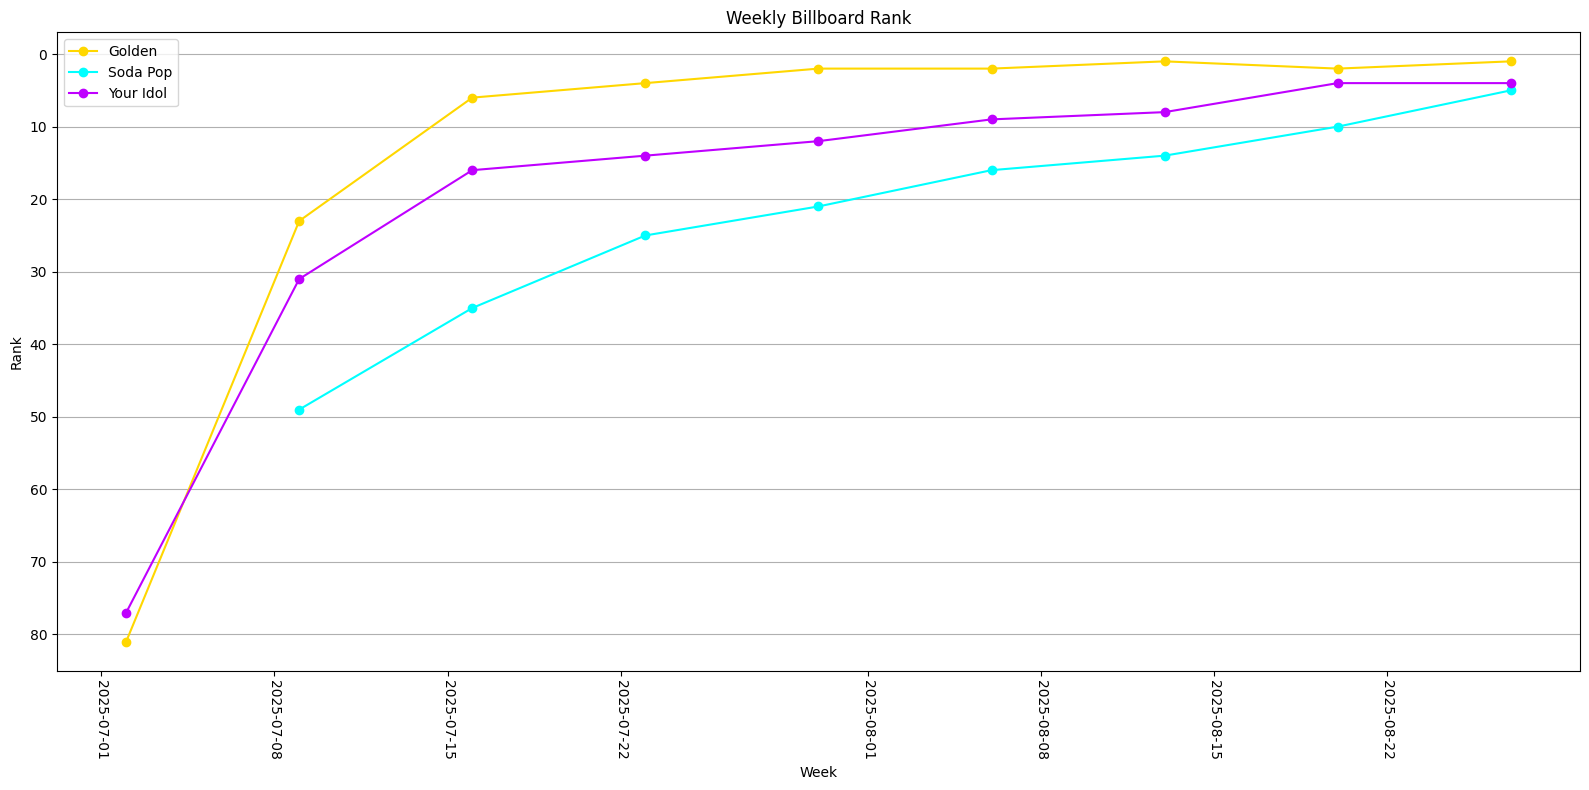

In [12]:
golden = search(df, "Golden", "HUNTR/X: EJAE| Audrey Nuna & REI AMI")
golden["Date"] = pd.to_datetime(golden["Date"])
golden = golden.sort_values("Date")

your_idol = search(df, "Your Idol", "Saja Boys: Andrew Choi| Neckwav| Danny Chung| Kevin Woo & samUIL Lee")
your_idol["Date"] =  pd.to_datetime(your_idol["Date"])
your_idol = your_idol.sort_values("Date")

soda_pop = search(df, "Soda Pop", "Saja Boys: Andrew Choi| Neckwav| Danny Chung| Kevin Woo & samUIL Lee")
soda_pop["Date"] =  pd.to_datetime(soda_pop["Date"])
soda_pop = soda_pop.sort_values("Date")

####Visualization####

fig, ax = plt.subplots(figsize=(16,8))


ax.plot(golden["Date"], golden["Rank"], marker="o",label="Golden",color = "#FFD700")
ax.invert_yaxis()
ax.set_title("Weekly Billboard Rank")
ax.set_xlabel("Week"); ax.set_ylabel("Rank")
ax.grid(True, axis="y")

ax.plot(soda_pop["Date"], soda_pop["Rank"], marker="o",label="Soda Pop",color="#00FFFF")

ax.plot(your_idol["Date"], your_idol["Rank"], marker="o",label="Your Idol",color = "#BF00FF")


plt.xticks(rotation=270)
plt.legend()
plt.tight_layout()
plt.show()

<br>

---

<br>

_**(Problem 2)**_ 빌보드 hot-100 $p_t$의 시계열 데이터로부터 미래의 순위를 예측하기 위해 **자기회귀(AR) 모델**을 사용할 것입니다. 자기 회귀 모델이란 데이터 $z_t$를 이용해 **과거 $h$개 값을 선형 결합하여 다음 값을 예측**하는 모델입니다.

학습 입력과 타깃은

$$
x^{(i)}=[z_i,\; z_{i+1},\; \dots,\; z_{i+(h-1)}],\qquad
y^{(i)}=z_{h+i},\quad i=1,\dots,T-h
$$

이고, 선형 예측기는

$$
\hat y^{(i)}=\hat z_{h+i}=\theta_1 z_i+\cdots+\theta_{h} z_{i+(h-1)}=\theta^\top x^{(i)}.
$$

$\theta\in\mathbb{R}^{h}$를 선택(학습)하여 관측치 $y^{(i)}$를 가장 잘 설명하도록 합니다.

그러면 예측은

$$
\hat z_{h+i+1}=\theta^\top x^{(i+1)}=\theta_1 z_{i}+\cdots+\theta_{h} z_{i+h-1}.
$$

이 됩니다.

$$X=\begin{bmatrix}
x^{1}\\
\vdots\\
x^{T-h}
\end{bmatrix}\in\mathbb{R}^{(T-h)\times(h)},\qquad
y=\begin{bmatrix}
y^{1}\\
\vdots\\
y^{T-h}
\end{bmatrix}\in\mathbb{R}^{T-h}$$

로 $X$와 $Y$를 정의했을 때,

아래 코드를 실행시키면 $X$와 $Y$를 얻을 수 있습니다.

In [69]:
#학습 데이터를 얻는 코드
import os

current_path = os.getcwd()

week_window_df = pd.read_csv(current_path + "/7week_window_hot100.csv")
week_window_df = week_window_df.sort_values(["window_id", "Date"])
arr = week_window_df["Rank"].to_numpy().reshape(-1, 7)
X = arr[:, :6]
Y = arr[:, 6]

이때 우리가 원하는 것은 이를 가장 잘 설명할 수 있는 optimal theta를 찾는 것입니다.

이때 선형방정식으로 나타낸다면 $Y = X\theta$가 되고, 목표는 mse(mean squared error) 를 감소시키는 것입니다.


$$
\boxed{\;\min_{\theta}\ \frac{1}{N}\,\|X\theta - Y\|_2^2\;}
$$


우리가 최소화하려는 MSE 함수 $\|X\theta - Y\|_2^2$는 $\theta$에 대한 아래로 볼록한 함수(Convex function)입니다.

이 함수의 오차가 최소가 되는 지점은 기울기가 0이 되는 지점입니다.

따라서 MSE 함수를 $\theta$에 대해 미분해서 그 값이 0이 되는 $\theta$를 찾으면, 그것이 바로 최적의 해 $\hat{\theta}$가 됩니다.

이 미분 과정을 거쳐 식을 정리하면 다음과 같은 해를 얻을 수 있습니다.

$$\hat{\theta} = (X^T X)^{-1} X^T Y$$

우리는 이 공식을 코드로 구현하여 최적의 $\theta$를 찾을 것입니다.

이를 해결하는 코드를 작성해주세요. (단 `numpy의 linalg.lstsq`를 사용해서는 안되고, X와 Y만을 이용해서 작성해주세요)





In [70]:
def get_optimal_theta(X,Y):
  ## To Do------------------------------------------------------------##
  ##                                                                  ##
  ## Least squares method를 찾아보고, 이를 행렬곱을 사용하여 구현     ##
  ##------------------------------------------------------------------##
  ## Your code here
  opt_theta = np.zeros(6)
  opt_theta = np.linalg.pinv(X)@Y
  opt_theta = np.linalg.inv(X.T@X)@X.T @ Y
  return opt_theta

opt_theta = get_optimal_theta(X,Y)


print(opt_theta)
print(f"MSE: {(np.linalg.norm(X@opt_theta-Y)**2)/len(Y)}")

##실제 Optimal 한 값과 비교, 만약 허용 오차보다 오차가 크다면 Error 반환##
assert np.linalg.norm(opt_theta-np.array([ 0.07633039, -0.06334248, -0.0977004,  -0.12336887, -0.16247039,  1.41040797])) <= 1e-7

[ 0.07633039 -0.06334248 -0.0977004  -0.12336887 -0.16247039  1.41040797]
MSE: 60.022659025107856


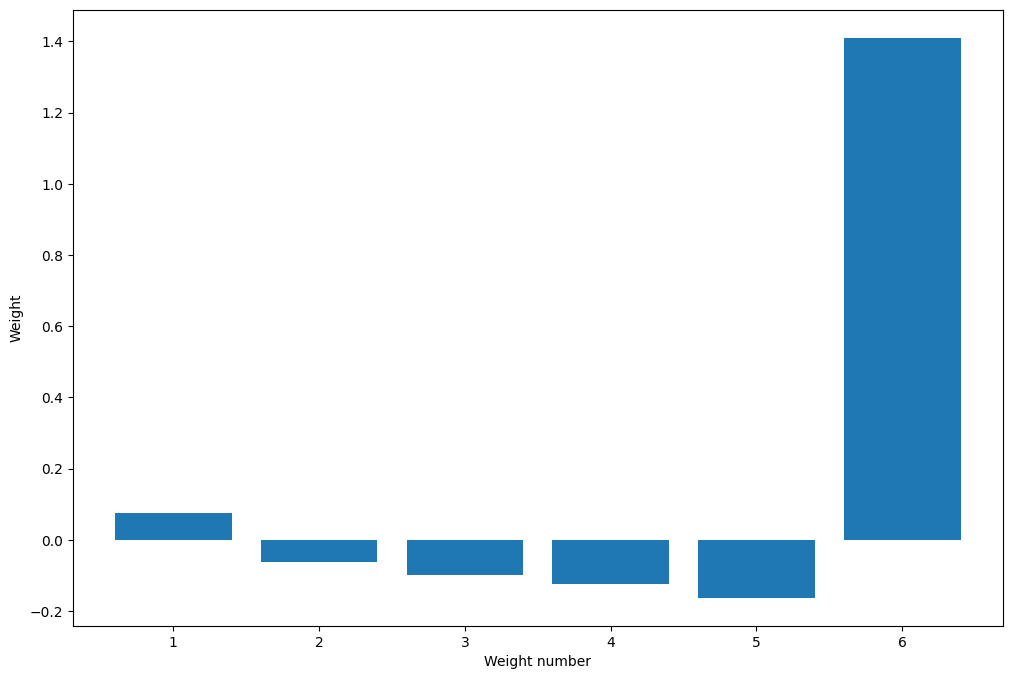

In [31]:
plt.figure(figsize=(12,8))
plt.bar(range(1,len(opt_theta)+1),opt_theta)
plt.xlabel("Weight number")
plt.ylabel("Weight")
plt.show()

In [52]:

def predict_autoregressive(music_name,Artist_name,opt_theta,regressive_length):
  data =  search(df, music_name,Artist_name)
  data["Date"] = pd.to_datetime(data["Date"])
  opt_theta = np.asarray(opt_theta).ravel()
  data_rank = data["Rank"].to_numpy()
  last_date = data["Date"].iloc[-1]
  predicted_data = {}
  predict_vector = np.zeros(6)
  predict_vector[0:6] = data_rank[len(data_rank)-6:len(data_rank)]
  for idx in range(regressive_length):
      predict_vector[5],predict_vector[:5] = int(np.clip(round(float(predict_vector @ opt_theta)), 1, 100)), predict_vector[1:]
      predicted_data[last_date + pd.Timedelta(weeks=idx+1)] = predict_vector[5]
  predicted_data=pd.Series(predicted_data).sort_index()
  return predicted_data

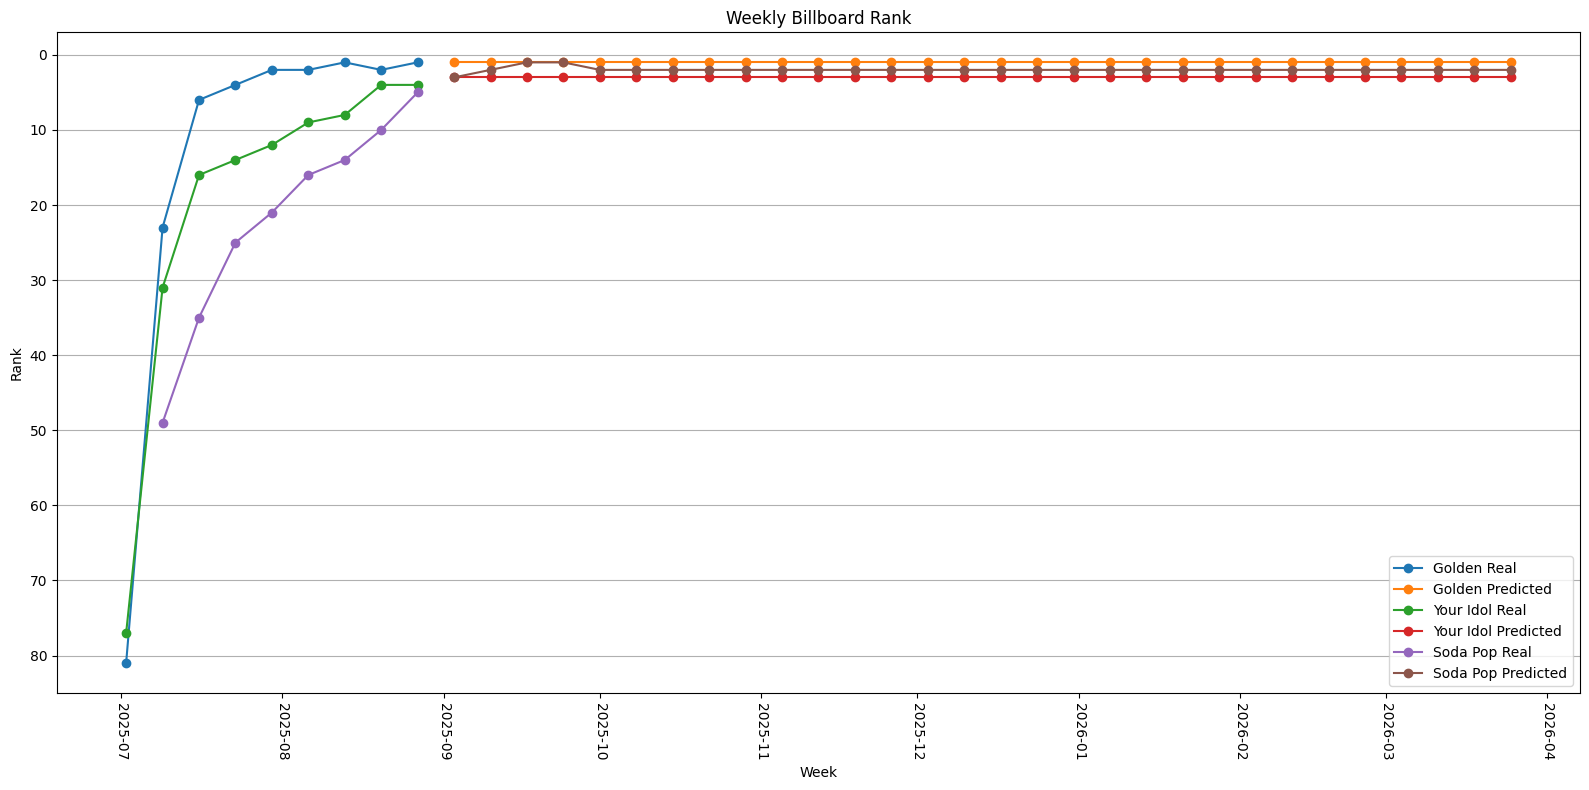

In [65]:
artist_music = {
    "Golden":"HUNTR/X: EJAE| Audrey Nuna & REI AMI",
    "Your Idol":"Saja Boys: Andrew Choi| Neckwav| Danny Chung| Kevin Woo & samUIL Lee",
    "Soda Pop":"Saja Boys: Andrew Choi| Neckwav| Danny Chung| Kevin Woo & samUIL Lee"
}

fig, ax = plt.subplots(figsize=(16,8))


for song, artist in artist_music.items():
    data = search(df,song,artist)
    data["Date"] = pd.to_datetime(data["Date"])
    data = data.sort_values("Date")
    predicted_data=predict_autoregressive(song,artist,opt_theta,30)

    ax.plot(data["Date"], data["Rank"], marker="o",label=f"{song} Real")
    ax.invert_yaxis()
    ax.set_title("Weekly Billboard Rank")
    ax.set_xlabel("Week"); ax.set_ylabel("Rank")
    ax.grid(True, axis="y")
    ax.plot(predicted_data.index, predicted_data.values, marker="o", label=f"{song} Predicted")


plt.xticks(rotation=270)
plt.legend()
plt.tight_layout()
plt.show()

<br>

---

<br>

_**(Problem 3)**_ 우리가 제작한 AR 모델을 적용해본 결과, 성능이 뛰어나지 않다는 것을 알게 되었습니다. 이때 search(df, "Radioactive", "Imagine Dragons")를 적용하여 데이터를 시각화해보면 아래 결과와 같이 나타납니다. 이를 보고 왜 AR 모델이 예측 성능이 떨어지는지를 작성해주세요. (
이 문제는 답이 없는 문제입니다! 스스로 원인을 찾아서 작성해보세요.)

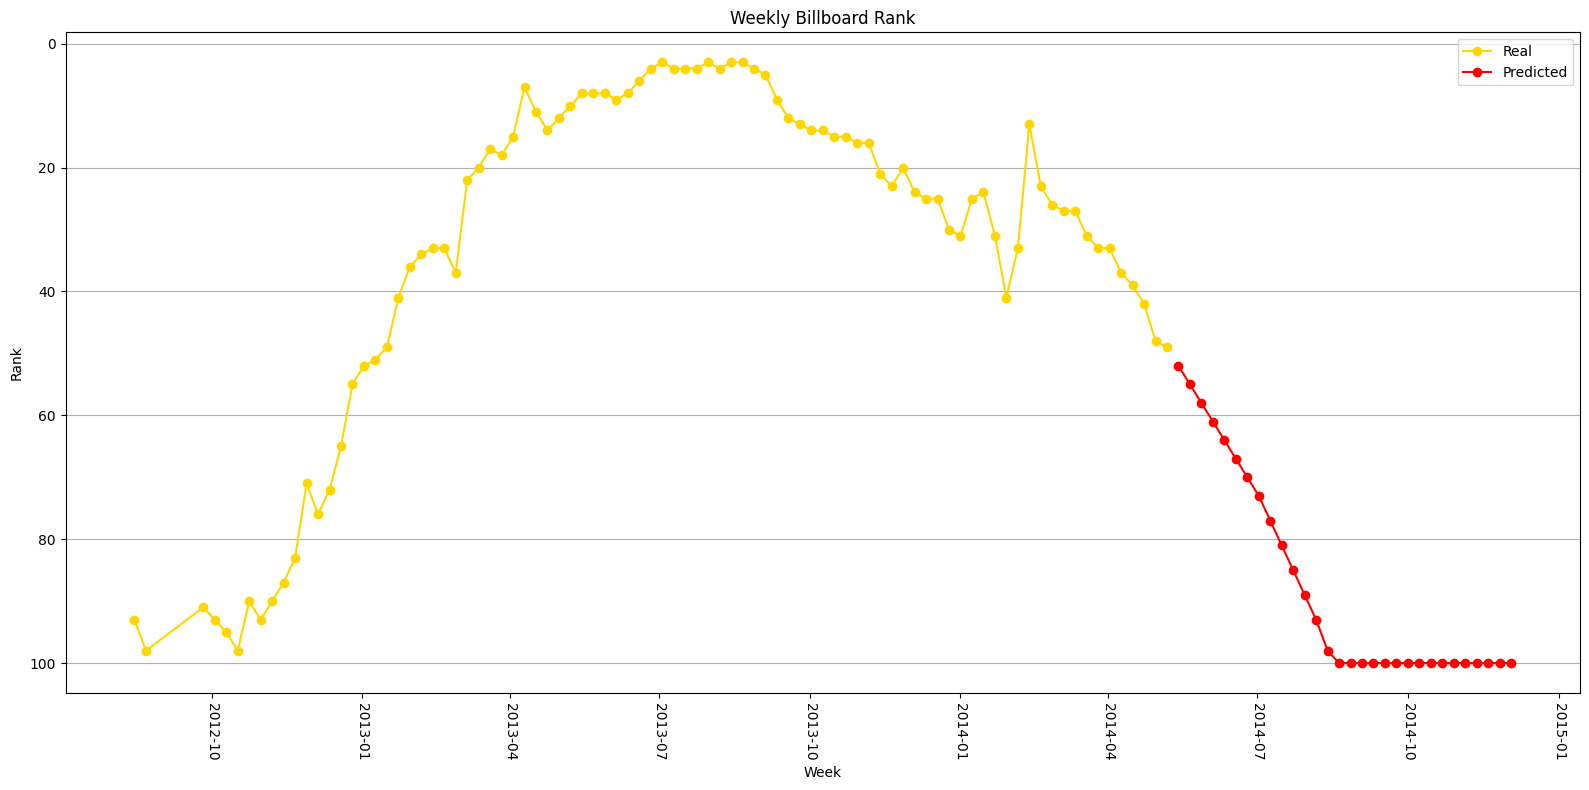

In [66]:
music_name = "Radioactive"
artist_name = "Imagine Dragons"
data = search(df,music_name,artist_name)
data["Date"] = pd.to_datetime(data["Date"])
data = data.sort_values("Date")
predicted_data=predict_autoregressive(music_name,artist_name,opt_theta,30)

fig, ax = plt.subplots(figsize=(16,8))


ax.plot(data["Date"], data["Rank"], marker="o",label="Real",color = "#FFD700")
ax.invert_yaxis()
ax.set_title("Weekly Billboard Rank")
ax.set_xlabel("Week"); ax.set_ylabel("Rank")
ax.grid(True, axis="y")
ax.plot(predicted_data.index, predicted_data.values, marker="o", label="Predicted", color="red")


plt.xticks(rotation=270)
plt.legend()
plt.tight_layout()
plt.show()

Answer: 학습된 Autoregressive 모델의 가중치를 살펴보면 맨 마지막 주차에 대한 가중치가 1.4로써 다른 가중치들에 비해 높은 값을 가지는 것을 알 수 있다. 이를 통해 모델은 전 주차에 지나치게 의존하는 모델인 것을 알 수 있으며, 이전의 추세를 그대로 따라가려는 경향이 매우 강하다.